In [2]:
import json 
import matplotlib.pyplot as plt 
import numpy as np
import datetime

In [3]:
def readJsonManually(name):
    f = open(name,'r', encoding='utf8')
    data = json.load(f) 
    f.close()
    return data

def saveJson(dictt):
    f = open('newData.json','w', encoding='utf8')
    data = json.dump(dictt,f) 
    f.close()

In [4]:
weekPeriod = 7 * 24 * 60 * 60 * 1000
hour = 60 * 60 * 1000
day = 24 * 60 * 60 * 1000

In [5]:
def convertMillis(millis):
    hours=int(millis/(1000*60*60))
    hours = int(hours)
    millis-=hours*60*60*1000
    
    minutes=int(millis/(1000*60))
    minutes = int(minutes)
    millis-=minutes*60*1000
    
    seconds=int(millis/1000)
    seconds = int(seconds)
   
    
    
    return str(hours)+":"+str(minutes)+":"+str(seconds)

# Already created dataset
#### currently some issues are happening at database. so we are combining new data with previously collected valid data

In [6]:
previousData= readJsonManually('data5.json')  #already collected valid data at checkpoint data3 folder 
#data3 is newjson of data3 folder

In [7]:
#list of already completed users
userInfoPrevious = previousData['UserInfo']
targetHistoryPrevious = previousData['TargetHistory']
usageHistoryPrevious = previousData['UsageHistory']

flag = {}

for x in userInfoPrevious:
    print(x)
    flag[x] = True


0000000202
2016615144
2016331099
2016331068
2016331066
2016331012
2016331037
2016331089
2016331049
2016331102
2016331072
510418137


# New dataset

In [8]:
data = readJsonManually('data.json')

In [9]:
userInfo = data['UserInfo']
targetHistory = data['TargetHistory']
usageHistory = data['UsageHistory']

In [10]:
#total user complete or incompelete at the end
totalUserCount = 0
totalMaleCount = 0
totalFemaleCount = 0
for x in userInfo:
    #print(x)
    gender = userInfo[x]['gender']
    if gender == 'male':
        totalMaleCount +=1
    else:
        totalFemaleCount +=1
    totalUserCount += 1
print('totalUserCount')
print(totalUserCount)
print('totalMaleCount')
print(totalMaleCount)
print('totalFemaleCount')
print(totalFemaleCount)

totalUserCount
33
totalMaleCount
26
totalFemaleCount
7


In [11]:
# list of new users whose 3 weeks expermient are done

st = {}
st = set()


for x in userInfo:
    user = userInfo[x]
    if "weekFourTwoStartTime" in user:
        if x not in flag:
            st.add(x)

for x in userInfo:
    user = userInfo[x]
    if "weekThreeStartTime" in user:
        item = targetHistory[x]
        if item['weekNumber'] == 1:
            if x not in flag:
                st.add(x)
                
st.discard('2016331006')
st.add("46039")

for i in st:
    print(i)

46323
46039
2016331096
2017333520
2016331080
2016331031
2015135051
2016331048


# new json generation

In [12]:
userInfo['46039']["weekThreeStartTime"] = userInfo['46039']["weekTwoStartTime"]
userInfo['46039']["weekTwoStartTime"] = 1610820000000 

#adding new users to previousdata
for i in st:
    userInfoPrevious[i] = userInfo[i]
    usageHistoryPrevious[i] = usageHistory[i]
    targetHistoryPrevious[i] = targetHistory[i]

#remove error data
#rm = ['2016331031', '2016331072', '0000000202','46323']
rm = ['2016331031', '2016331072', '510418137','46323']
for y in rm:
    userInfoPrevious.pop(y)
    usageHistoryPrevious.pop(y)
    targetHistoryPrevious.pop(y)
    st.discard(y)


previousData['TargetHistory'] = targetHistoryPrevious
previousData['UserInfo'] = userInfoPrevious
previousData['UsageHistory'] = usageHistoryPrevious
    
saveJson(previousData)

# new data saved now assign all the data as previous
userInfo = userInfoPrevious
usageHistory = usageHistoryPrevious
targetHistory = targetHistoryPrevious
# these dicts will be used afterwards

# add all users key to st . st is set so nothing to worry. :3
#total user complete
validUserCount = 0
validMaleCount = 0
validFemaleCount = 0
for x in userInfo:
    #print(x)
    st.add(x)
    gender = userInfo[x]['gender']
    if gender == 'male':
        validMaleCount +=1
    else:
        validFemaleCount +=1
    validUserCount += 1
    
print('validUserCount')
print(validUserCount)
print('validMaleCount')
print(validMaleCount)
print('validFemaleCount')
print(validFemaleCount)
print(st)
print(len(st))

validUserCount
16
validMaleCount
13
validFemaleCount
3
{'2016331068', '46039', '2016331012', '2016331096', '2016331037', '2017333520', '0000000202', '2016331080', '2016331049', '2016331066', '2015135051', '2016331099', '2016331089', '2016331102', '2016331048', '2016615144'}
16


# adding related infos of users in st set in crosscheck list 

In [13]:
import csv

#### indexes

In [14]:
with open('survey_response.csv', 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        for i in range(len(row)):
            print(i)
            print(row[i])
        break

0
Timestamp
1
Email
2
Registration/Roll No
3
Gender
4
Age
5
Do you think you overuse smartphone?
6
How do you limit(or try to limit) your smartphone usage?
7
Do you wish to limit your smartphone usage?
8
Have you ever used any smartphone usage limiting app?
9
Are you currently using any smartphone usage limiting app?
10
Why donâ€™t you use it anymore?
11
Why donâ€™t you use any smartphone usage limiting app?
12
What do you think your daily average smartphone usage time is(approximately)?
13
What types of apps do you think you use the most?
14
How do you think you spend most of the time on your smartphone?
15
Which app do you think you use the most?
16
When do you think you use your smartphone the most?
17
How does having family members around affect your smartphone using?


In [15]:
crosscheck = {}
with open('survey_response.csv', 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        ls = []
        ls.append(row[12]) ##What do you think your daily average smartphone usage time is(approximately)?
        ls.append(row[15]) #Which app do you think you use the most?
        ls.append(row[16]) #When do you think you use your smartphone the most?
        if row[2] in st:
            crosscheck[row[2]] = ls
        if '1702093' == row[2]:
            crosscheck['46039'] = ls # this user filled up survey with 1702093 and app with 46039
        
print(len(crosscheck))

for key in crosscheck:
    print('reg: {0} hour {1}'.format(key,crosscheck[key]))

16
reg: 2016331102 hour ['4 hours', 'Facebook', 'Late at Night (12am-6am)']
reg: 2016331049 hour ['6 hours', 'Youtube', 'Afternoon (12pm-6pm)']
reg: 2016331096 hour ['3 hours', 'Facebook', 'Late at Night (12am-6am)']
reg: 2016331099 hour ['5 hours', 'Free Fire', 'Late Evening ( 9pm-12am)']
reg: 2016331012 hour ['6 hours', 'Facebook', 'Late Evening ( 9pm-12am)']
reg: 2016615144 hour ['9 hours', 'Facebook', 'Late Evening ( 9pm-12am)']
reg: 0000000202 hour ['7 hours', 'Youtube', 'Late at Night (12am-6am)']
reg: 2016331048 hour ['4 hours', 'Chrome', 'Late Evening ( 9pm-12am)']
reg: 2016331089 hour ['More than 12 hours', 'telegram', 'Late Evening ( 9pm-12am)']
reg: 46039 hour ['10 hours', 'Youtube', 'Late at Night (12am-6am)']
reg: 2016331068 hour ['5 hours', 'Facebook', 'Late at Night (12am-6am)']
reg: 2016331037 hour ['1 hour', 'Youtube', 'Late at Night (12am-6am)']
reg: 2016331066 hour ['3 hours', 'Facebook', 'Late at Night (12am-6am)']
reg: 2015135051 hour ['6 hours', 'Facebook', 'Late 

# Functions

In [45]:
def getUsageOrLaunchCount(startTime,endTime,hour,appsInstallationTime,usage,purpose,weekOne):
    packageName = ""
    usageTimeorCount = 0
    for i in range(startTime,endTime,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                packageName = hourlyUsage["packageName"].replace('.','_dot_')
                if packageName in appsInstallationTime:
                    installTime = appsInstallationTime[packageName]['installationTime']
                    if installTime < weekOne:
                        #hourlyUsage = hourlyUsageArray[0]
                        usageTimeorCount+=hourlyUsage[purpose]
                else:
                    #print(packageName)
                    pass
    return usageTimeorCount


def autolabel(rects,ax,purpose,avgUsageOrLaunchInMillis):
        """Attach a text label above each bar in *rects*, displaying its height."""
        i = 0
        for rect in rects:
            height = rect.get_height()
            val = height
            if purpose == 'foregroundTime':
                val = convertMillis(avgUsageOrLaunchInMillis[i])
            
            ax.annotate('{}'.format(val),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            i+=1

def getAverageWeeklyUsage(purpose):
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0

    avgUsageOrLaunch = [0,0,0]
    
    fig, ax = plt.subplots(figsize=(5, 7))

    userCount = 0

    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]
        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        avgUsageOrLaunch[0]+= getUsageOrLaunchCount(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[1]+= getUsageOrLaunchCount(weekTwo,weekThree,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[2]+= getUsageOrLaunchCount(weekThree,weekFour,hour,appsInstallationTime,usage,purpose,weekOne)


    avgUsageOrLaunch = [int(x / userCount) for x in avgUsageOrLaunch]
    print(userCount)
    avgUsageOrLaunchInMillis = list(avgUsageOrLaunch)
    print(avgUsageOrLaunch)
    print('dif 1st week - 2nd week')
    print(avgUsageOrLaunch[0]-avgUsageOrLaunch[1])
    print((avgUsageOrLaunch[0]-avgUsageOrLaunch[1])/avgUsageOrLaunch[0])
    
    print('dif 3rd week - 2nd week')
    print(avgUsageOrLaunch[2]-avgUsageOrLaunch[1])
    print((avgUsageOrLaunch[2]-avgUsageOrLaunch[1])/avgUsageOrLaunch[2])
    
    if purpose == "foregroundTime":
        print("{0} , {1} , {2}".format(convertMillis(avgUsageOrLaunch[0]),convertMillis(avgUsageOrLaunch[1]),convertMillis(avgUsageOrLaunch[2])))

    tick_label = ['Week1', 'Week2', 'Week3']
    left = [1,2,3]
    #ax.set_xlabel('Week') 
    
    if purpose == "foregroundTime":
        avgUsageOrLaunch = [x / hour for x in avgUsageOrLaunch]
        ax.set_ylabel('Time in Hour')
        ax.set_title('Weekly Usage chart')
    else:
        ax.set_ylabel('Launched')
        ax.set_title('Weekly Launch Count chart')
    #plt.figure(figsize=(5,6))
    width = 0.5
    rect = ax.bar(left, avgUsageOrLaunch
    , tick_label = tick_label ,color=['green', 'red', 'green']) 
    autolabel(rect,ax,purpose,avgUsageOrLaunchInMillis)
    plt.savefig('weeklyusage.png', dpi=300)
    
def plotIndividualUsersUsageInSeperateGraphs(purpose):
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0



    userCount = 0

    fig, ax = plt.subplots(ncols=len(st), figsize=(80, 5)) # len(st) number of user
    #fig, ax = plt.subplots()

    dec = 0

    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]
        avgUsageOrLaunch = [0,0,0]

        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        avgUsageOrLaunch[0]+= getUsageOrLaunchCount(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[1]+= getUsageOrLaunchCount(weekTwo,weekThree,hour,appsInstallationTime,usage,purpose,weekOne)
        avgUsageOrLaunch[2]+= getUsageOrLaunchCount(weekThree,weekFour,hour,appsInstallationTime,usage,purpose,weekOne)
        
        avgUsageOrLaunchInMillis = list(avgUsageOrLaunch)

        print(avgUsageOrLaunch)
        if avgUsageOrLaunch[0]>avgUsageOrLaunch[1]:
            print("Decreased")
            dec+=1
        else:
            print("no effect")
        
        if purpose == "foregroundTime":
            print("{0} , {1} , {2}".format(convertMillis(avgUsageOrLaunch[0]),convertMillis(avgUsageOrLaunch[1]),convertMillis(avgUsageOrLaunch[2])))
            print("average daily usages in week1 {0}".format(convertMillis((avgUsageOrLaunch[0])/7.0)))
        print(key)
        print('survey response: think he use {0}'.format(crosscheck[key]))
        
        print('\n')
        
        tick_label = ['Week1', 'Week2', 'Week3']
        x = np.arange(0,21,10) # the label locations
        width = 0.8  # the width of the bars

        if purpose == "foregroundTime":
            avgUsageOrLaunch = [x / hour for x in avgUsageOrLaunch]
            ax[userCount-1].set_ylabel('Time in Hour')
            ax[userCount-1].set_title('Weekly Usage chart')
        else:
            ax[userCount-1].set_ylabel('Launched')
            ax[userCount-1].set_title('Weekly Launch Count chart')
        ax[userCount-1].set_xticks(x)
        ax[userCount-1].set_xticklabels(tick_label)
        
        rect = ax[userCount-1].bar(x, avgUsageOrLaunch, width, label=key)
        autolabel(rect,ax[userCount-1],purpose,avgUsageOrLaunchInMillis)
        ax[userCount-1].legend()
        fig.tight_layout()

    print('total user whose usage decresed in 2nd week {0}% ({1})'.format((dec/userCount)*100, dec))
    plt.show()

# plot average weekly usage in one graph

16
[149207247, 140242111, 152811200]
dif 1st week - 2nd week
8965136
0.06008512441758275
dif 3rd week - 2nd week
12569089
0.08225240689164146
41:26:47 , 38:57:22 , 42:26:51


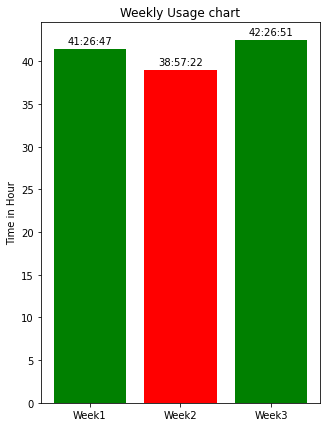

In [46]:
getAverageWeeklyUsage("foregroundTime")

# plot all in one graph

In [18]:
# "weekOneStartTime"
# "weekTwoStartTime"
# "weekThreeStartTime"

# weekOne = 0
# weekTwo = 0
# weekThree = 0
# weekFour = 0



# userCount = 0

# #fig, ax = plt.subplots(ncols=10, figsize=(30, 10))
# fig, ax = plt.subplots(figsize=(20,5))



# for key in userInfo:
#     userCount+=1
#     user = userInfo[key]
#     weekTwo = user["weekTwoStartTime"]
#     weekOne = weekTwo - weekPeriod
#     weekThree = weekTwo + weekPeriod
#     weekFour = weekThree + weekPeriod

    
#     usage = usageHistory[key]
#     avgUsage = [0,0,0]
    
#     appsInstallationTime = targetHistory[key]['appsInstallationInfo']
    
#     avgUsage[0]+= getUsageOrLaunchCount(weekOne,weekTwo,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
#     avgUsage[1]+= getUsageOrLaunchCount(weekTwo,weekThree,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
#     avgUsage[2]+= getUsageOrLaunchCount(weekThree,weekFour,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
            
#     print(avgUsage)
#     print("{0} , {1} , {2}".format(convertMillis(avgUsage[0]),convertMillis(avgUsage[1]),convertMillis(avgUsage[2])))
#     print(key)
    
#     tick_label = ['Week1', 'Week2', 'Week3']
#     x = np.arange(0,len(st)*2+1,len(st)) # the label locations for max 10 user currently
#     width = 0.8  # the width of the bars
    
#     rect = ax.bar(x+userCount-1, avgUsage, width, label=key)
#     autolabel(rect,ax)

# ax.set_ylabel('Time in Milis')
# ax.set_title('Weekly Usage chart')
# ax.set_xticks(x)
# ax.set_xticklabels(tick_label)
# ax.legend()
# fig.tight_layout()
    
# plt.show()

# plot individual users usage in seperate graphs

[232109511, 277404191, 275335767]
no effect
64:28:29 , 77:3:24 , 76:28:55
average daily usages in week1 9:12:38
0000000202
survey response: think he use ['7 hours', 'Youtube', 'Late at Night (12am-6am)']


[102348697, 133559099, 137695002]
no effect
28:25:48 , 37:5:59 , 38:14:55
average daily usages in week1 4:3:41
2016615144
survey response: think he use ['9 hours', 'Facebook', 'Late Evening ( 9pm-12am)']


[152578906, 150297262, 122818351]
Decreased
42:22:58 , 41:44:57 , 34:6:58
average daily usages in week1 6:3:16
2016331099
survey response: think he use ['5 hours', 'Free Fire', 'Late Evening ( 9pm-12am)']


[147983660, 113768330, 131245480]
Decreased
41:6:23 , 31:36:8 , 36:27:25
average daily usages in week1 5:52:20
2016331068
survey response: think he use ['5 hours', 'Facebook', 'Late at Night (12am-6am)']


[100772698, 70354346, 131114757]
Decreased
27:59:32 , 19:32:34 , 36:25:14
average daily usages in week1 3:59:56
2016331066
survey response: think he use ['3 hours', 'Facebook'

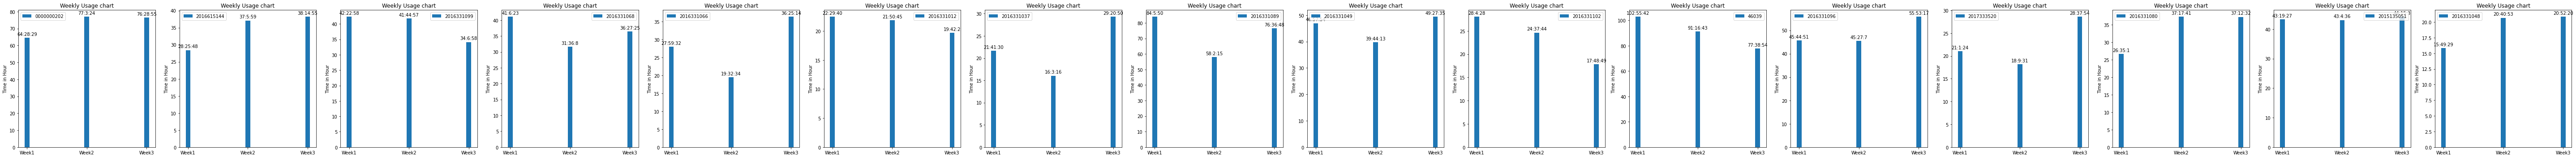

In [19]:
plotIndividualUsersUsageInSeperateGraphs("foregroundTime")

# plot average weekly launch count in one graph

16
[3709, 3549, 3435]
dif 1st week - 2nd week
160
0.043138312213534646
dif 3rd week - 2nd week
-114
-0.03318777292576419


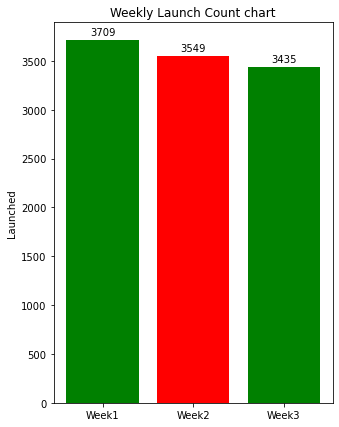

In [20]:
getAverageWeeklyUsage("launchCount")

# plot individual users launch count in seperate graphs

In [21]:
#plotIndividualUsersUsageInSeperateGraphs("launchCount")

# show weekly usage of any specific app

In [22]:
#function

def getUsageOfSpecificApp(startTime,endTime,usage,packageName,hour):
    usageTime = 0
    for i in range(startTime,endTime,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                if hourlyUsage["packageName"] == packageName:
                    usageTime+=hourlyUsage["foregroundTime"]
    return usageTime

In [23]:
# packageName =  "com.ahtrapotpid.appusagetracker"

# "weekOneStartTime"
# "weekTwoStartTime"
# "weekThreeStartTime"

# weekOne = 0
# weekTwo = 0
# weekThree = 0
# weekFour = 0



# userCount = 0

# fig, ax = plt.subplots(ncols=len(st), figsize=(35, 5)) # len(st) number of user
# #fig, ax = plt.subplots()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# for key in userInfo:
#     userCount+=1
#     user = userInfo[key]
#     weekTwo = user["weekTwoStartTime"]
#     weekOne = weekTwo - weekPeriod
#     weekThree = weekTwo + weekPeriod
#     weekFour = weekThree + weekPeriod

    
#     usage = usageHistory[key]
#     avgUsage = [0,0,0]
    
#     avgUsage[0] = getUsageOfSpecificApp(weekOne,weekTwo,usage,packageName,hour)
#     avgUsage[1] = getUsageOfSpecificApp(weekTwo,weekThree,usage,packageName,hour)
#     avgUsage[2] = getUsageOfSpecificApp(weekThree,weekFour,usage,packageName,hour)

#     print(avgUsage)
#     print("{0} , {1} , {2}".format(convertMillis(avgUsage[0]),convertMillis(avgUsage[1]),convertMillis(avgUsage[2])))
#     print(key)
    
#     tick_label = ['Week1', 'Week2', 'Week3']
#     x = np.arange(0,21,10) # the label locations
#     width = 0.8  # the width of the bars
    
#     rect = ax[userCount-1].bar(x, avgUsage, width, label=key)
#     #autolabel(rect)
#     ax[userCount-1].set_ylabel('Time in Milis')
#     ax[userCount-1].set_title('Weekly usage of App Usage Monitor chart')
#     ax[userCount-1].set_xticks(x)
#     ax[userCount-1].set_xticklabels(tick_label)
#     ax[userCount-1].legend()
#     fig.tight_layout()
    
# plt.show()


# show top 10 app used(usage) in each week

In [24]:
#functions

def getDicto(startTime,endTime,hour,appsInstallationTime,usage,purpose,weekOne,dictionary):
    packageName = ""
    dicto = dictionary
    exclude = ["Quickstep","System launcher","Launcher3","POCO Launcher","System UI","One UI Home","Huawei Home", "Shady Launcher"]
    
    for i in range(startTime,endTime,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                packageName = hourlyUsage["packageName"].replace('.','_dot_')
                if packageName in appsInstallationTime:
                    installTime = appsInstallationTime[packageName]['installationTime']
                    if installTime < weekOne:
                        name = hourlyUsage['name']
                        if name=="Lite":
                            name = "Facebook"
                        if name in dicto and name not in exclude:
                            dicto[name]+=hourlyUsage[purpose]
                        elif hourlyUsage['name'] not in exclude:
                             dicto[name]=hourlyUsage[purpose]
                else:
                    #print(packageName)
                    pass
    return dicto

def getTopTenEachWeek(purpose):
    
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0

    userCount = 0

    dicto1 = {}
    dicto2 = {}
    dicto3 = {}
    

    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]

        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        dicto1= getDicto(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne,dicto1)
        dicto2= getDicto(weekTwo,weekThree,hour,appsInstallationTime,usage,purpose,weekOne,dicto2)
        dicto3= getDicto(weekThree,weekFour,hour,appsInstallationTime,usage,purpose,weekOne,dicto3)


    for i in dicto1:
        dicto1[i]/=userCount
        dicto1[i]/=7.0
    for i in dicto2:
        dicto2[i]/=userCount
        dicto2[i]/=7.0
    for i in dicto3:
        dicto3[i]/=userCount
        dicto3[i]/=7.0

    week1 = sorted(dicto1.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
    week2 = sorted(dicto2.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
    week3 = sorted(dicto3.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
    week1.reverse()
    week2.reverse()
    week3.reverse()


    print("Week1 Week2 Week3")
    
    if purpose == "launchCount":
        
        for i in range(10):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],week1[i][1]), end =" ")
            print("{0} used {1}".format(week2[i][0],week2[i][1]), end =" ")
            print("{0} used {1}".format(week3[i][0],week3[i][1]))
    else:
        for i in range(10):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],convertMillis(week1[i][1])), end =" ")
            print("{0} used {1}".format(week2[i][0],convertMillis(week2[i][1])), end =" ")
            print("{0} used {1}".format(week3[i][0],convertMillis(week3[i][1])))

    fig, ax = plt.subplots(ncols=3, figsize=(35, 5)) # len(st) number of user
    #fig, ax = plt.subplots()

    data1 = [j for (i,j) in week1]
    tick_label1 = [i for (i,j) in week1]
    data2 = [j for (i,j) in week2]
    tick_label2 = [i for (i,j) in week2]
    data3 = [j for (i,j) in week3]
    tick_label3 = [i for (i,j) in week3]

    data = [data1,data2,data3]
    dataInMillis = list(data)
    
    tick_label = [tick_label1,tick_label2,tick_label3]


    for i in range(3):
        value = data[i]
        x = np.arange(0,10) # the label locations
        width = 0.8  # the width of the bars
        if purpose == "launchCount":
            ax[i].set_ylabel('LaunchCount')
        else:
            value = [x/hour for x in value]
            ax[i].set_ylabel('Time in Hour')
        ax[i].set_title('Top 10 used Apps in week'+str(i+1))
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(tick_label[i])
        rect = ax[i].bar(x, value, width, label="week"+str(i+1))
        autolabel(rect,ax[i],purpose, dataInMillis[i])
        ax[i].legend()
        fig.tight_layout()
    plt.show()

Week1 Week2 Week3
1  Facebook used 1:24:26 Facebook used 1:29:8 Facebook used 1:25:56
2  Messenger used 0:38:40 Messenger used 0:40:10 YouTube used 0:47:23
3  YouTube used 0:35:36 YouTube used 0:39:14 Messenger used 0:39:35
4  Chrome used 0:32:59 Chrome used 0:22:49 Chrome used 0:27:47
5  Free Fire used 0:10:5 WhatsApp used 0:8:34 Phone used 0:10:58
6  Phone used 0:9:2 Zoom used 0:8:0 Free Fire used 0:9:45
7  WhatsApp used 0:8:13 Phone used 0:7:44 WhatsApp used 0:8:16
8  Zoom used 0:7:41 MX Player used 0:7:8 MX Player used 0:7:4
9  Instagram used 0:6:36 Free Fire used 0:3:59 Instagram used 0:4:37
10  Gallery used 0:4:30 Instagram used 0:3:53 Bangla Dictionary used 0:4:31


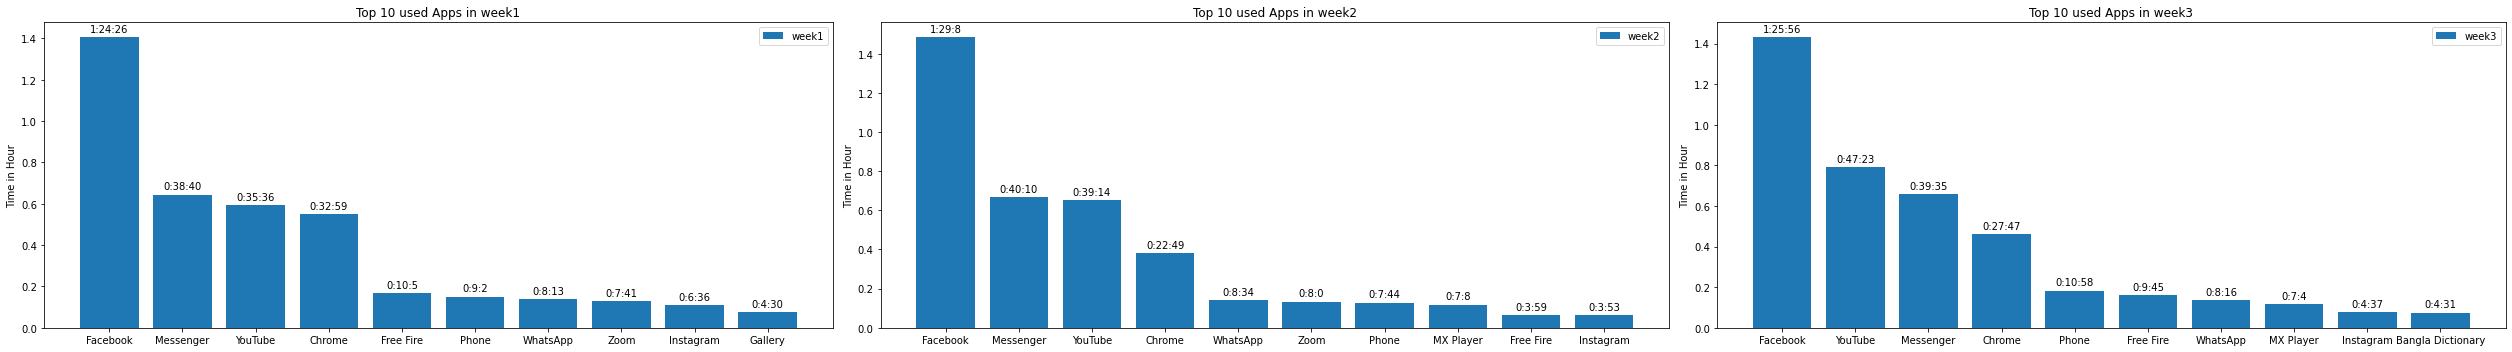

In [25]:
getTopTenEachWeek("foregroundTime")

# show top 10 app used(launch) in each week

Week1 Week2 Week3
1  Facebook used 103.5 Facebook used 103.23214285714286 Facebook used 92.625
2  Messenger used 57.669642857142854 Messenger used 60.88392857142857 Messenger used 57.169642857142854
3  WhatsApp used 38.42857142857143 WhatsApp used 38.285714285714285 WhatsApp used 38.67857142857143
4  Gallery used 15.5625 Phone used 16.526785714285715 Phone used 15.857142857142858
5  Phone used 14.392857142857142 Gallery used 11.241071428571429 Gallery used 12.598214285714286
6  Chrome used 12.392857142857142 Chrome used 9.848214285714286 YouTube used 11.705357142857142
7  Security used 10.392857142857142 YouTube used 9.267857142857142 Security used 9.839285714285714
8  YouTube used 9.383928571428571 Security used 8.6875 Chrome used 9.25
9  Instagram used 9.285714285714286 Settings used 7.767857142857143 Settings used 8.410714285714286
10  Settings used 8.848214285714286 Contacts and dialer used 7.598214285714286 Contacts and dialer used 7.75


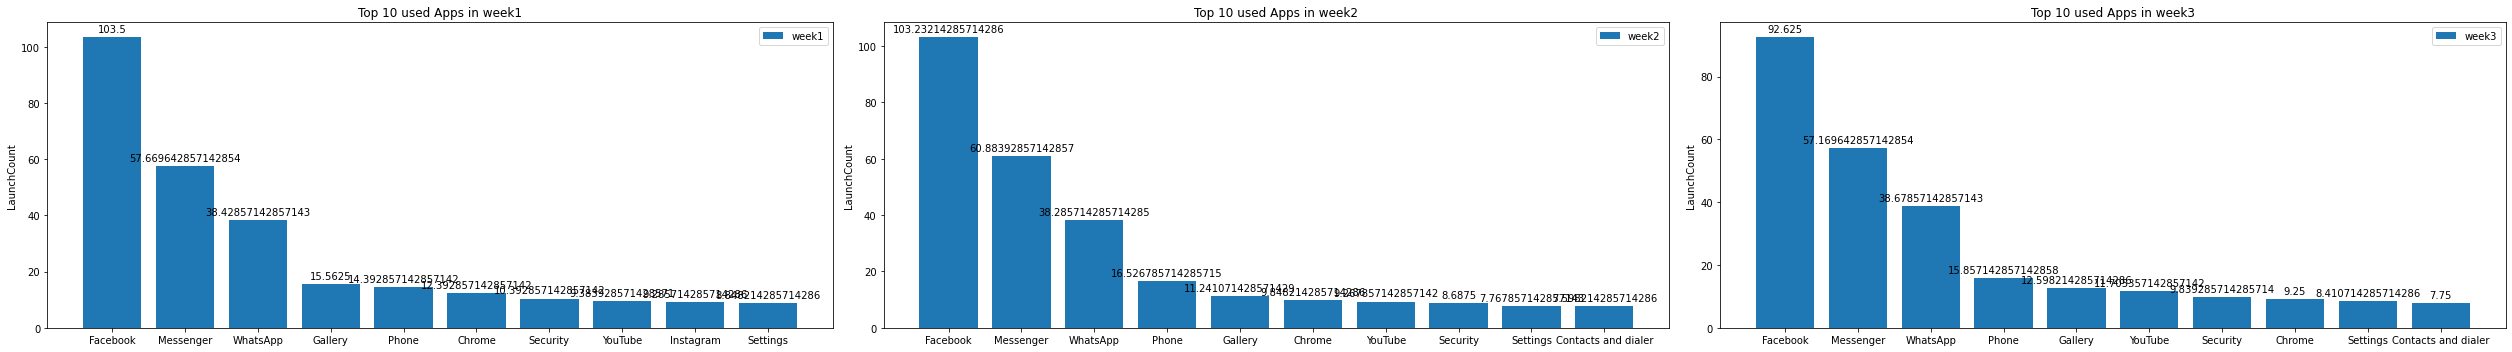

In [26]:
getTopTenEachWeek("launchCount")

# get top 10 app in first week

In [43]:
def getTopTen(purpose):
    
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0

    userCount = 0

    dicto1 = {}


    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]

        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        dicto1= getDicto(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne,dicto1)


    for i in dicto1:
        dicto1[i]/=7.0
        dicto1[i]/=userCount
    print(userCount)
        

    week1 = sorted(dicto1.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
    week1.reverse()

    print("Week1")
    
    if purpose == "launchCount":
        
        for i in range(10):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],week1[i][1]), end =" ")

    else:
        for i in range(10):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],convertMillis(week1[i][1])), end =" ")

    fig, ax = plt.subplots(figsize=(9, 5)) # len(st) number of user

    data = [j for (i,j) in week1]
    dataInMillis = list(data)
    
    tick_label = [i for (i,j) in week1]

    x = np.arange(0,10) # the label locations
    width = 0.5  # the width of the bars

    
    
    if purpose == "launchCount":
        data = [int(j) for (i,j) in week1]
        ax.set_ylabel('Launch Count')
    else:
        data = [(x/hour) for x in data]
        ax.set_ylabel('Time in Hour')
    #ax.set_title('Top 10 used applications in first week based on average daily use time')
    ax.set_xticks(x)
    ax.set_xticklabels(tick_label)
    rect = ax.bar(x, data, width , label="Week 1")
    autolabel(rect,ax,purpose,dataInMillis)
    ax.legend()
    fig.tight_layout()
    plt.savefig('top10-2.png', dpi=300)
    plt.show()

16
Week1
1  Facebook used 1:24:26 2  Messenger used 0:38:40 3  YouTube used 0:35:36 4  Chrome used 0:32:59 5  Free Fire used 0:10:5 6  Phone used 0:9:2 7  WhatsApp used 0:8:13 8  Zoom used 0:7:41 9  Instagram used 0:6:36 10  Gallery used 0:4:30 

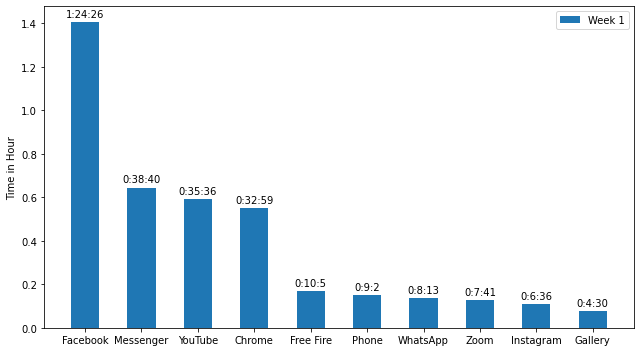

In [42]:
getTopTen("foregroundTime")

16
Week1
1  Facebook used 103.5 2  Messenger used 57.669642857142854 3  WhatsApp used 38.42857142857143 4  Gallery used 15.5625 5  Phone used 14.392857142857142 6  Chrome used 12.392857142857142 7  Security used 10.392857142857142 8  YouTube used 9.383928571428571 9  Instagram used 9.285714285714286 10  Settings used 8.848214285714286 

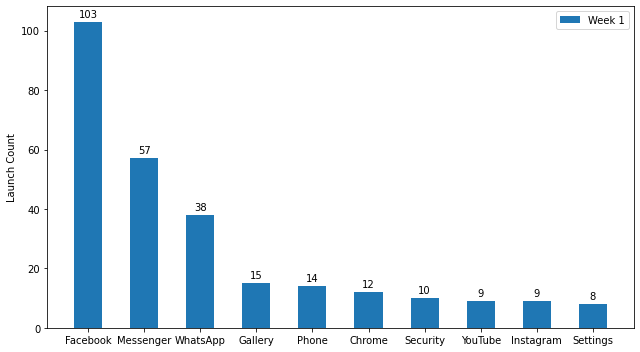

In [44]:
getTopTen("launchCount")

# apps used most by individual user (first week)

In [30]:
#functions

def getTopApp(purpose):
    
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0

    


    for key in userInfo:
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod
        dicto1 = {}

        usage = usageHistory[key]

        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        dicto1= getDicto(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne,dicto1)


        for i in dicto1:
            dicto1[i]/=7.0 # daily average usage

        week1 = sorted(dicto1.items(), key = lambda kv:(kv[1], kv[0]))[-1:]
        week1.reverse()

        print(key)
        
        print('survey response: think he use {0}'.format(crosscheck[key]))
    
        if purpose == "launchCount":
        
            for i in range(1):
                print(i+1, end =" ")
                print(" {0} used {1}".format(week1[i][0],week1[i][1]), end =" ")

        else:
            for i in range(1):
                print(i+1, end =" ")
                print(" {0} used {1}".format(week1[i][0],convertMillis(week1[i][1])), end =" ")
        print('\n')


    

In [31]:
getTopApp("foregroundTime")

0000000202
survey response: think he use ['7 hours', 'Youtube', 'Late at Night (12am-6am)']
1  Facebook used 4:34:34 

2016615144
survey response: think he use ['9 hours', 'Facebook', 'Late Evening ( 9pm-12am)']
1  Facebook used 1:59:7 

2016331099
survey response: think he use ['5 hours', 'Free Fire', 'Late Evening ( 9pm-12am)']
1  Messenger used 2:22:5 

2016331068
survey response: think he use ['5 hours', 'Facebook', 'Late at Night (12am-6am)']
1  Messenger used 1:45:7 

2016331066
survey response: think he use ['3 hours', 'Facebook', 'Late at Night (12am-6am)']
1  Facebook used 1:59:6 

2016331012
survey response: think he use ['6 hours', 'Facebook', 'Late Evening ( 9pm-12am)']
1  Chrome used 1:34:4 

2016331037
survey response: think he use ['1 hour', 'Youtube', 'Late at Night (12am-6am)']
1  WhatsApp used 0:54:18 

2016331089
survey response: think he use ['More than 12 hours', 'telegram', 'Late Evening ( 9pm-12am)']
1  Chrome used 2:22:28 

2016331049
survey response: think he u

# Time periods when apps were used the most

0000000202
[('Afternoon (12pm-6pm)', 75230366)]
survey response: think he use ['7 hours', 'Youtube', 'Late at Night (12am-6am)']


2016615144
[('Afternoon (12pm-6pm)', 30360887)]
survey response: think he use ['9 hours', 'Facebook', 'Late Evening ( 9pm-12am)']


2016331099
[('Afternoon (12pm-6pm)', 44964533)]
survey response: think he use ['5 hours', 'Free Fire', 'Late Evening ( 9pm-12am)']


2016331068
[('Afternoon (12pm-6pm)', 45150756)]
survey response: think he use ['5 hours', 'Facebook', 'Late at Night (12am-6am)']


2016331066
[('Late at Night (12am-6am)', 34651282)]
survey response: think he use ['3 hours', 'Facebook', 'Late at Night (12am-6am)']


2016331012
[('Evening ( 6pm-9pm)', 24928223)]
survey response: think he use ['6 hours', 'Facebook', 'Late Evening ( 9pm-12am)']


2016331037
[('Afternoon (12pm-6pm)', 27433083)]
survey response: think he use ['1 hour', 'Youtube', 'Late at Night (12am-6am)']


2016331089
[('Afternoon (12pm-6pm)', 118255255)]
survey response: think he u

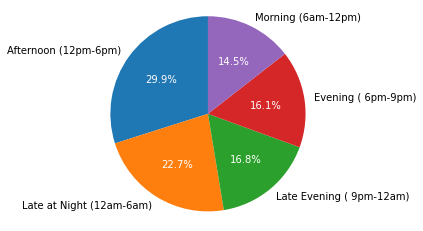

In [40]:
weekOne = 0
weekTwo = 0

userCount = 0

dicto = {"Late at Night (12am-6am)":0,"Late Evening ( 9pm-12am)":0,"Afternoon (12pm-6pm)":0,"Evening ( 6pm-9pm)":0,"Morning (6am-12pm)":0}


for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod

    tempDicto = {"Late at Night (12am-6am)":0,"Late Evening ( 9pm-12am)":0,"Afternoon (12pm-6pm)":0,"Evening ( 6pm-9pm)":0,"Morning (6am-12pm)":0}
    usage = usageHistory[key]
    appsInstallationTime = targetHistory[key]['appsInstallationInfo']
    
    for i in range(weekOne,weekTwo,day):
        start = i
        end = i+6*hour
        tempDicto["Late at Night (12am-6am)"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Late at Night (12am-6am)"]+=tempDicto["Late at Night (12am-6am)"]
        start = end
        end = end + 6 * hour
        tempDicto["Morning (6am-12pm)"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Morning (6am-12pm)"]+=tempDicto["Morning (6am-12pm)"]
        start = end
        end = end + 6 * hour
        tempDicto["Afternoon (12pm-6pm)"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Afternoon (12pm-6pm)"]+=tempDicto["Afternoon (12pm-6pm)"]
        start = end
        end = end + 3 * hour
        tempDicto["Evening ( 6pm-9pm)"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Evening ( 6pm-9pm)"]+=tempDicto["Evening ( 6pm-9pm)"]
        start = end
        end = end + 3 * hour
        tempDicto["Late Evening ( 9pm-12am)"]+= getUsageOrLaunchCount(start,end,hour,appsInstallationTime,usage,"foregroundTime",weekOne)
        dicto["Late Evening ( 9pm-12am)"]+=tempDicto["Late Evening ( 9pm-12am)"]
    
    temp = sorted(tempDicto.items(), key = lambda kv:(kv[1], kv[0]))[-1:]
    temp.reverse()
    print(key)
    print(temp)
    print('survey response: think he use {1}'.format(key,crosscheck[key]))
    print('\n')
        
for i in dicto:
        dicto[i]/=userCount
temp = sorted(dicto.items(), key = lambda kv:(kv[1], kv[0]))[-10:]
temp.reverse()
print(temp)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = []
sizes = []
for x in temp:
    labels.append(x[0])
    sizes.append(x[1])

fig1, ax1 = plt.subplots()
_, _, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('piechart.png', dpi=300)
plt.show()

#### category pie chart

In [33]:
## category calculated based on top 20 app
categoryMap = {}
categoryMap['Facebook'] = "Social"
categoryMap['Twitter'] = "Social"
categoryMap['Messenger'] = "Communication"
categoryMap['Gmail'] = "Communication"
categoryMap['YouTube'] = "Entertainment"
categoryMap['Chrome'] = "Browser"
categoryMap['Free Fire'] = "Gaming"
categoryMap['TempleRun2'] = "Gaming"
categoryMap['Lite'] = "Social"
categoryMap['Phone'] = "Communication"
categoryMap['WhatsApp'] = "Communication"
categoryMap['Zoom'] = "Communication"
categoryMap['Instagram'] =  "Social"
categoryMap['Gallery'] = "Others"
categoryMap['MX Player'] = "Entertainment"
categoryMap['UPX'] = "Browser"
categoryMap['Telegram'] = "Communication"
categoryMap['UC Browser'] = "Browser"
categoryMap['Opera'] = "Browser"
categoryMap['Clock'] = "Others"
categoryMap['Snapchat'] = "Social"
categoryMap['PL'] = "Entertainment"
categoryMap['FotMob'] = "Entertainment"
categoryMap['Bangla Dictionary'] = "Others"



def findCategory(st):
    if st in categoryMap:
        return categoryMap[st]
    else:
        return "Others"

In [38]:
def getCategoryDicto(startTime,endTime,hour,appsInstallationTime,usage,purpose,weekOne,dictionary):
    packageName = ""
    dicto = dictionary
    exclude = ["Quickstep","System launcher","Launcher3","POCO Launcher","System UI","One UI Home","Huawei Home", "Shady Launcher"]
    
    for i in range(startTime,endTime,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                packageName = hourlyUsage["packageName"].replace('.','_dot_')
                if packageName in appsInstallationTime:
                    installTime = appsInstallationTime[packageName]['installationTime']
                    if installTime < weekOne:
                        if findCategory(hourlyUsage['name']) in dicto and hourlyUsage['name'] not in exclude:
                            dicto[findCategory(hourlyUsage['name'])]+=hourlyUsage[purpose]
                        elif hourlyUsage['name'] not in exclude:
                            dicto[findCategory(hourlyUsage['name'])]=hourlyUsage[purpose]
                else:
                    #print(packageName)
                    pass
    return dicto

def categoryPieChart(purpose):
    
    "weekOneStartTime"
    "weekTwoStartTime"
    "weekThreeStartTime"

    weekOne = 0
    weekTwo = 0
    weekThree = 0
    weekFour = 0

    userCount = 0

    dicto1 = {}


    for key in userInfo:
        userCount+=1
        user = userInfo[key]
        weekTwo = user["weekTwoStartTime"]
        weekOne = weekTwo - weekPeriod
        weekThree = weekTwo + weekPeriod
        weekFour = weekThree + weekPeriod


        usage = usageHistory[key]

        appsInstallationTime = targetHistory[key]['appsInstallationInfo']

        dicto1= getCategoryDicto(weekOne,weekTwo,hour,appsInstallationTime,usage,purpose,weekOne,dicto1)



    for i in dicto1:
        dicto1[i]/=7.0
        dicto1[i]/=userCount
        

    week1 = sorted(dicto1.items(), key = lambda kv:(kv[1], kv[0]))[-20:]
    week1.reverse()



    print("Week1")
    
    if purpose == "launchCount":
        
        for i in range(len(week1)):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],week1[i][1]), end =" ")

    else:
        for i in range(len(week1)):
            print(i+1, end =" ")
            print(" {0} used {1}".format(week1[i][0],convertMillis(week1[i][1])), end =" ")

#     data = [j for (i,j) in week1]
#     tick_label = [i for (i,j) in week1]

#     fig1, ax1 = plt.subplots()
#     _, _, autotexts = ax1.pie(data, labels=tick_label, autopct='%1.1f%%',
#             shadow=False, startangle=90)
#     for autotext in autotexts:
#         autotext.set_color('white')
    
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#     plt.show()
    fig, ax = plt.subplots(figsize=(9, 5)) # len(st) number of user
    #fig, ax = plt.subplots()

    data = [j for (i,j) in week1]
    dataInMillis = list(data)
    
    tick_label = [i for (i,j) in week1]

    x = np.arange(0,len(data)) # the label locations
    width = 0.5  # the width of the bars

    
    
    if purpose == "launchCount":
        data = [int(j) for (i,j) in week1]
        ax.set_ylabel('Launch Count')
    else:
        data = [(x/hour) for x in data]
        ax.set_ylabel('Time in Hour')
    #ax.set_title('Top 10 used applications in first week based on average daily use time')
    ax.set_xticks(x)
    ax.set_xticklabels(tick_label)
    rect = ax.bar(x, data, width , label="Week 1")
    autolabel(rect,ax,purpose,dataInMillis)
    ax.legend()
    fig.tight_layout()
    plt.savefig('category.png', dpi=300)
    plt.show()
    

Week1
1  Social used 1:32:44 2  Communication used 1:7:13 3  Entertainment used 0:42:4 4  Browser used 0:41:23 5  Others used 0:28:25 6  Gaming used 0:10:49 

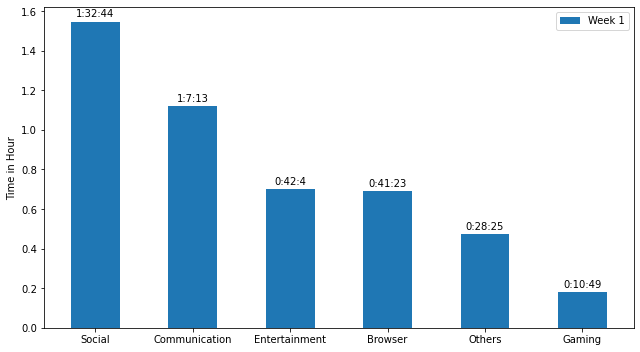

In [39]:
categoryPieChart('foregroundTime')